In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff"
data = pd.read_csv(url, skiprows=40, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
1,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
2,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1


In [16]:
# Step 2: Add column names (from the dataset description)
column_names = [
    'having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
    'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
    'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL',
    'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
    'Redirect', 'on_mouseover', 'RightClick', 'popUpWindow', 'Iframe', 'age_of_domain',
    'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result'
]
data.columns = column_names


In [17]:
# Step 3: Display dataset information
print("=== Dataset Information ===")
print(data.info())  # Provides info about columns, data types, and non-null counts
#  Check for missing values
print(data.isnull().sum())  # No missing values in this dataset


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11043 entries, 0 to 11042
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11043 non-null  int64
 1   URL_Length                   11043 non-null  int64
 2   Shortining_Service           11043 non-null  int64
 3   having_At_Symbol             11043 non-null  int64
 4   double_slash_redirecting     11043 non-null  int64
 5   Prefix_Suffix                11043 non-null  int64
 6   having_Sub_Domain            11043 non-null  int64
 7   SSLfinal_State               11043 non-null  int64
 8   Domain_registeration_length  11043 non-null  int64
 9   Favicon                      11043 non-null  int64
 10  port                         11043 non-null  int64
 11  HTTPS_token                  11043 non-null  int64
 12  Request_URL                  11043 non-null  int64
 13  URL_of_Anchor     

In [18]:
# Step 4: Display statistical description of the dataset
print("\n=== Statistical Description ===")
print(data.describe())  # Provides summary statistics for numerical features


=== Statistical Description ===
       having_IP_Address    URL_Length  Shortining_Service  having_At_Symbol  \
count       11043.000000  11043.000000        11043.000000      11043.000000   
mean            0.313411     -0.634338            0.739564          0.700263   
std             0.949661      0.765556            0.673117          0.713918   
min            -1.000000     -1.000000           -1.000000         -1.000000   
25%            -1.000000     -1.000000            1.000000          1.000000   
50%             1.000000     -1.000000            1.000000          1.000000   
75%             1.000000     -1.000000            1.000000          1.000000   
max             1.000000      1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count              11043.000000   11043.000000       11043.000000   
mean                   0.741556      -0.734674           0.064204   
std                    0.670922       0

C:\Users\Karim\AppData\Local\Temp\ipykernel_25472\1532884406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=data, palette='Set2')


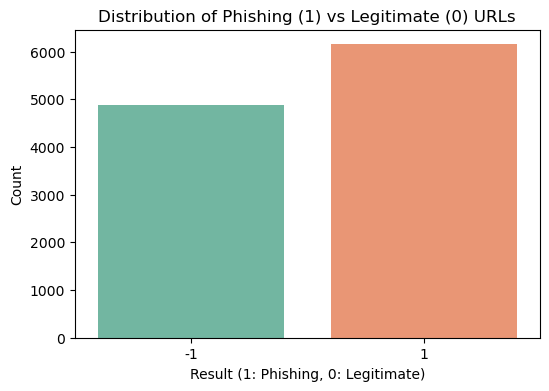

In [19]:
# Step 5: Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Result', data=data, palette='Set2')
plt.title("Distribution of Phishing (1) vs Legitimate (0) URLs")
plt.xlabel("Result (1: Phishing, 0: Legitimate)")
plt.ylabel("Count")
plt.show()

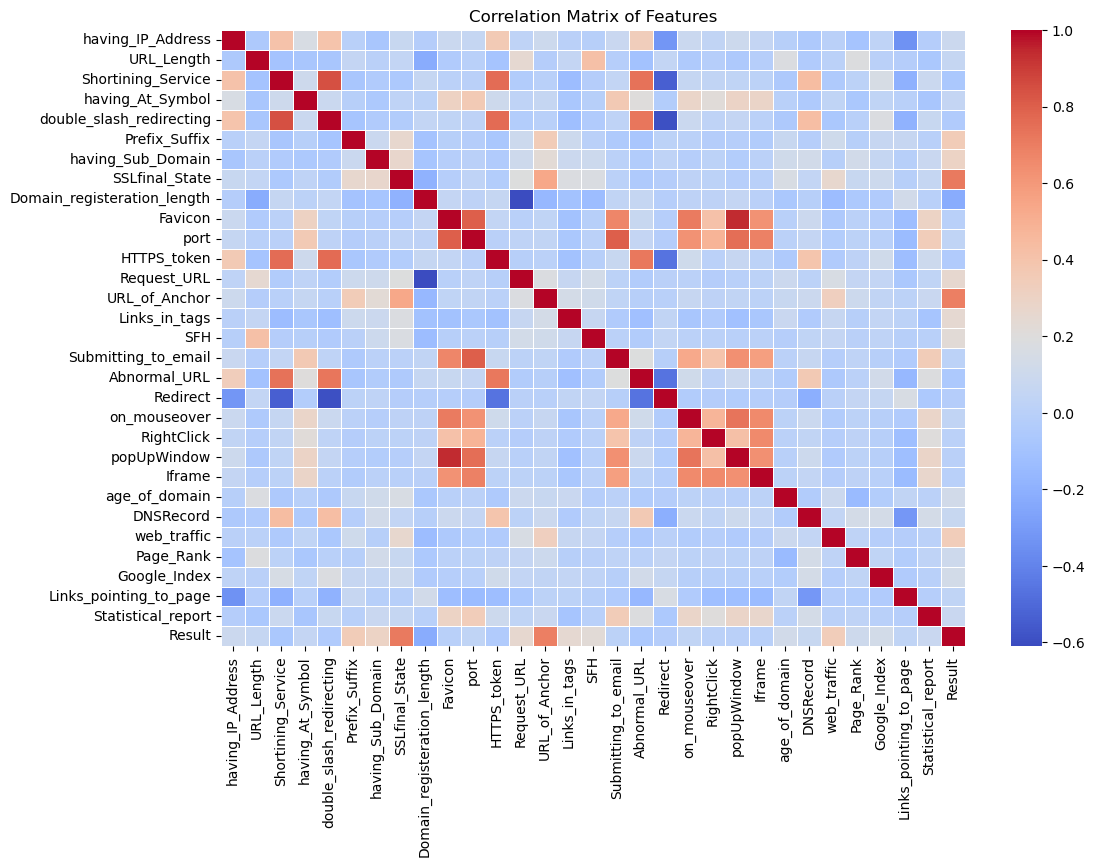

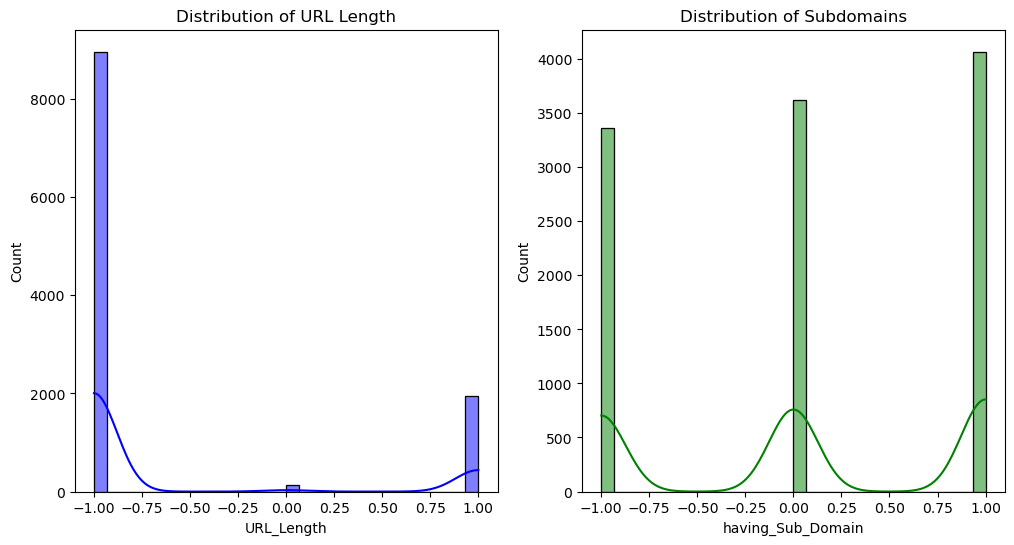

In [20]:
# Step 6: Visualize correlations between features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Step 7: Visualize the distribution of a few key features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['URL_Length'], bins=30, kde=True, color='blue')
plt.title("Distribution of URL Length")

plt.subplot(1, 2, 2)
sns.histplot(data['having_Sub_Domain'], bins=30, kde=True, color='green')
plt.title("Distribution of Subdomains")
plt.show()


In [21]:
# Step 8: Separate features and target variable
X = data.drop('Result', axis=1)  # Features
y = data['Result']  # Target variable


In [22]:
# Step 9: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Now the dataset is ready for model training!
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
X_train.head()


Training data shape: (8834, 30)
Testing data shape: (2209, 30)


AttributeError: 'numpy.ndarray' object has no attribute 'head'